In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [40]:
df = pd.read_csv("C:/Users/hp/Downloads/archive (19)/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [41]:
for col in df.columns:
    print(f"'{col}'")

'customerID'
'gender'
'SeniorCitizen'
'Partner'
'Dependents'
'tenure'
'PhoneService'
'MultipleLines'
'InternetService'
'OnlineSecurity'
'OnlineBackup'
'DeviceProtection'
'TechSupport'
'StreamingTV'
'StreamingMovies'
'Contract'
'PaperlessBilling'
'PaymentMethod'
'MonthlyCharges'
'TotalCharges'
'Churn'


In [42]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
df = df.dropna() 
df = df[df['TotalCharges'] != " "] 
df['TotalCharges'] = df['TotalCharges'].astype(float) 

In [45]:
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    if column != 'customerID':  # We don't need to encode customer ID
        df[column] = le.fit_transform(df[column])


In [46]:
# Step 5: Split features and target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [49]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7963094393186657
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1036
           1       0.61      0.64      0.62       373

    accuracy                           0.80      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409



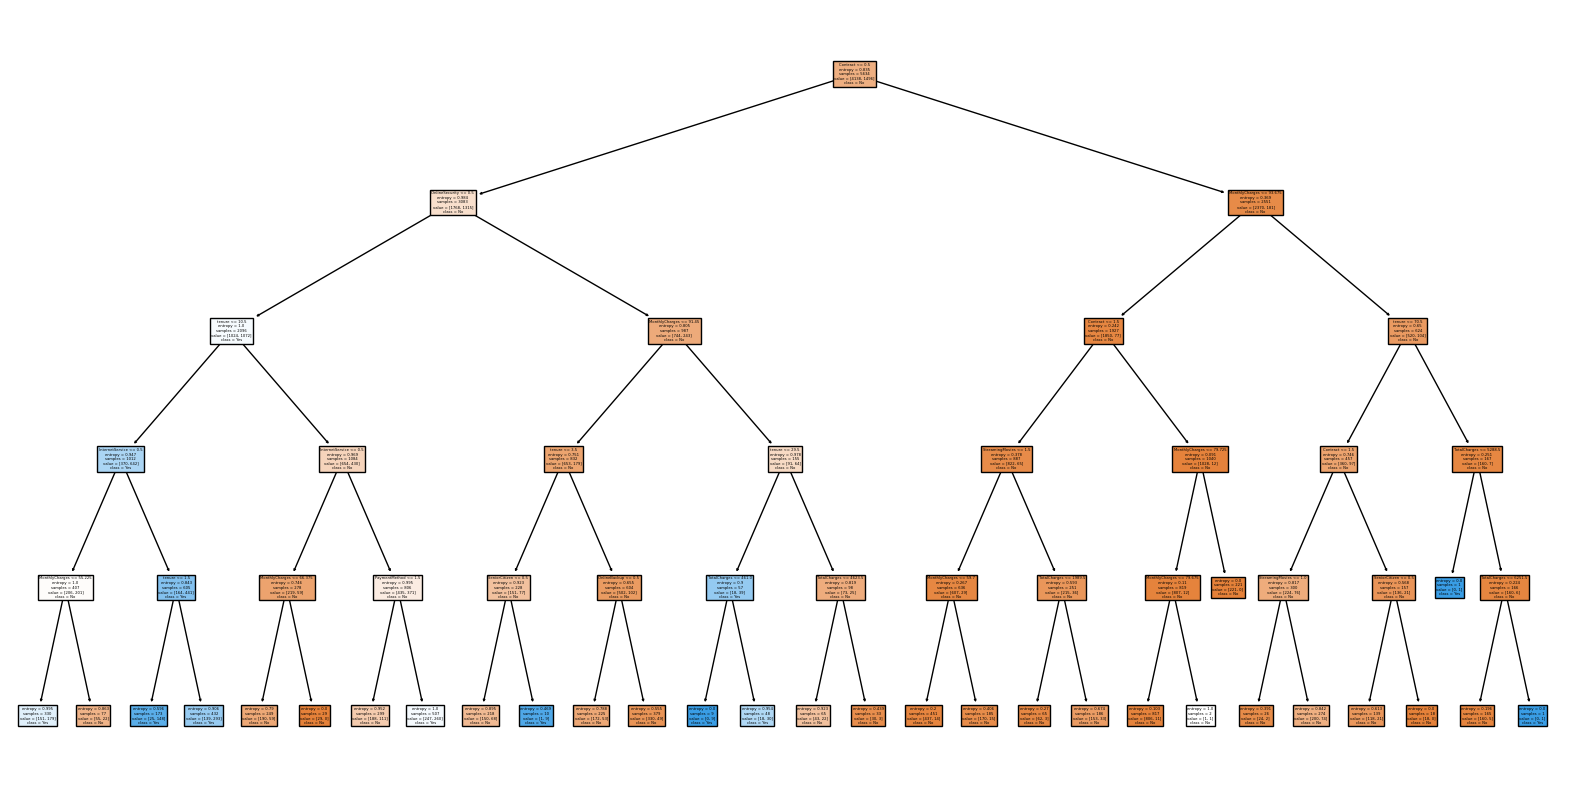

In [51]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=list(X.columns), class_names=['No', 'Yes'], filled=True)
plt.show()
